# Seminário 1 - Redes Neurais
## Classificadores de Margem Larga

Anilton Cardoso Junior

## TODO: 
Trabalho Margem Larga
- mostrar um caso simples -> 2 gaussians 
- mostrar a solução do SVM


- mostrar a solução de um Perceptron simples 
- mostrar as melhorias propostas pelo Braga
- Large Margin Perceptron
- FMP 
- Direct SVM
- caso mais complexo 


https://paperswithcode.com/paper/max-margin-deep-generative-models-for-semi


https://paperswithcode.com/paper/when-will-gradient-methods-converge-to-max
https://paperswithcode.com/paper/gradient-descent-maximizes-the-margin-of


- calcular margem 
- mostrar robustez por meio de testes estatísticos
- aumentar quantidade de datasets

https://ieeexplore.ieee.org/abstract/document/9064693


https://github.com/koshian2/affinity-loss/blob/master/mnist_affinity_visualize.py
https://github.com/tchlux/util/blob/1.0.18/util/approximate/neural_network/__init__.py
https://github.com/bmgee/votedperceptron/tree/master/votedperceptron

## Formulações Margem Larga e Perceptron

Vamos gerar um problema de classificação com 2 classes linearmente separáveis

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
O código está escondido por default, para mostrar/esconder
clique <a href="javascript:code_toggle()">AQUI</a>.''')


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from pathlib import Path

import tp1
import tensorflow as tf

In [5]:
num_examples = 200
classe1 = np.column_stack((np.random.normal(1.0, 1.5, num_examples), np.random.normal(1.0, 1.5, num_examples)))
classe2 = np.random.normal(8, 3, num_examples * 2).reshape(num_examples, 2)
X = np.row_stack((classe1, classe2))
y = np.array([1] * num_examples + [0] * num_examples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

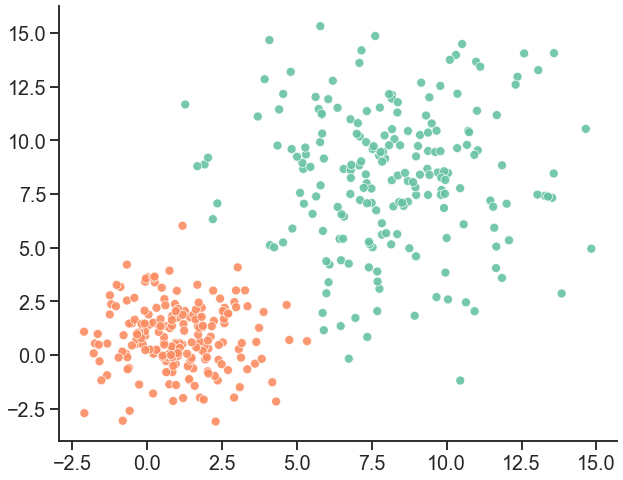

In [6]:
fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], hue = y, legend= None, alpha = 0.9)
sns.despine()


## SVM (Baseline)

Rodar um simples SVM para ver a solução de margem máxima
- Usando Kernel Linear (problema é linearmente separável)

In [7]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 12)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

def plot_svm_resuls():
    # plot the line, the points, and the nearest vectors to the plane
    fig = plt.figure(figsize=(10, 8))
    _ = sns.scatterplot(X[:,0], X[:,1], hue = y, legend= None, alpha = 0.9)
    sns.despine()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")


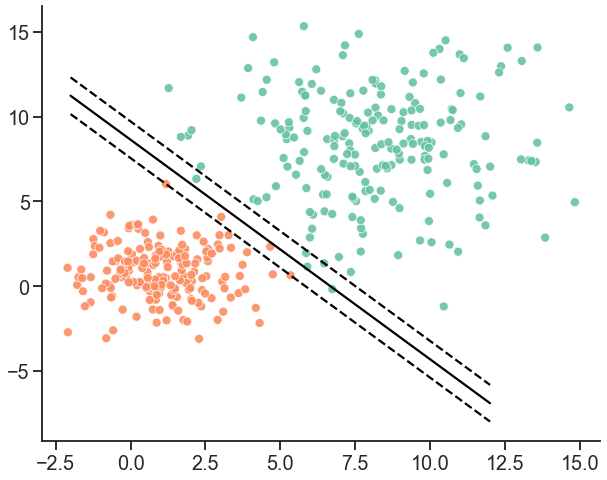

In [8]:
plot_svm_resuls()

### Resultados

Neste problema simples, o SVM resultou em uma acurácia de 99.2% no conjunto te testes e a matriz de confusão: 

|          | Positive | Negative |
|----------|----------|----------|
| Positive | 57       | 1        |
| Negative | 0        | 62       |

In [10]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) 
confusion_matrix(y_test, y_pred)

0.9916666666666667


array([[57,  1],
       [ 0, 62]], dtype=int64)

## MLP
Solução de Perceptron simples para comparação

In [11]:
# nn, history = tp1.tf_build_model(X_train, y_train, X_test, y_test, 
#                                 hidden_dimensions = [8],
#                                 activation = 'tanh', 
#                                 optimizer = 'adam', 
#                                 lr = 0.001, 
#                                 loss = 'binary_crossentropy',
#                                 l2_regularization = None, 
#                                 batch_size = 10,
#                                 epochs = 600)

nn = tp1.tf_build_nn_model(hidden_dimensions= [8], 
                            activation = 'tanh', 
                            optimizer = 'adam', 
                            lr = 0.001, 
                            loss = 'binary_crossentropy',
                            l2_regularization = None)

batch_size = 10
epochs = 600
steps_per_epoch = len(X_train) // (batch_size * 10) # 10 epochs for completing the dataset


train_dataset = tp1.tf_build_dataset(X_train, 
                                        y_train,
                                        batch_size = batch_size, 
                                        training = True)

eval_dataset = tp1.tf_build_dataset(X_test, 
                                        y_test, 
                                        batch_size = batch_size,
                                        training = False)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = epochs / 2, mode = 'auto', verbose = 1)]

history = nn.fit(train_dataset,
                epochs = epochs,
                steps_per_epoch = steps_per_epoch,
                validation_data = eval_dataset, 
                callbacks = []) # callbacks)

Epoch 1/600
2/2 [==============================] - 2s 401ms/step - loss: 0.7042 - accuracy: 0.5500 - binary_acuracy: 0.5500 - auc: 1.0000 - auc_pr: 1.0000 - val_loss: 0.9577 - val_accuracy: 0.5417 - val_binary_acuracy: 0.5417 - val_auc: 0.9892 - val_auc_pr: 0.9903
Epoch 2/600
2/2 [==============================] - 0s 19ms/step - loss: 0.8000 - accuracy: 0.6000 - binary_acuracy: 0.6000 - auc: 1.0000 - auc_pr: 1.0000 - val_loss: 0.9503 - val_accuracy: 0.5417 - val_binary_acuracy: 0.5417 - val_auc: 0.9890 - val_auc_pr: 0.9903
Epoch 3/600
2/2 [==============================] - 0s 19ms/step - loss: 0.7052 - accuracy: 0.6500 - binary_acuracy: 0.6500 - auc: 0.9896 - auc_pr: 0.9853 - val_loss: 0.9432 - val_accuracy: 0.5417 - val_binary_acuracy: 0.5417 - val_auc: 0.9903 - val_auc_pr: 0.9910
Epoch 4/600
2/2 [==============================] - 0s 23ms/step - loss: 0.7328 - accuracy: 0.6500 - binary_acuracy: 0.6500 - auc: 0.9835 - auc_pr: 0.9696 - val_loss: 0.9361 - val_accuracy: 0.5417 - val_binar

Já o Perceptron com apenas uma camada com 8 neurônios conseguiu uma acurácia de 95.8%. Um pouco melhor que o SVM. Porém, vamos analisar a fronteira de decisão

### Curvas de Erro e Fronteira de Decisão

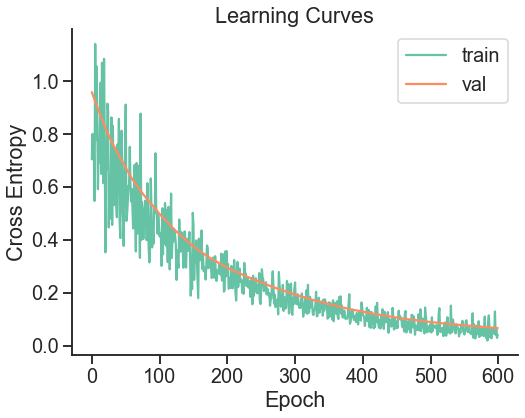

In [12]:
fig = plt.figure(figsize=(8, 6))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
sns.despine()

plt.show()

<AxesSubplot:>

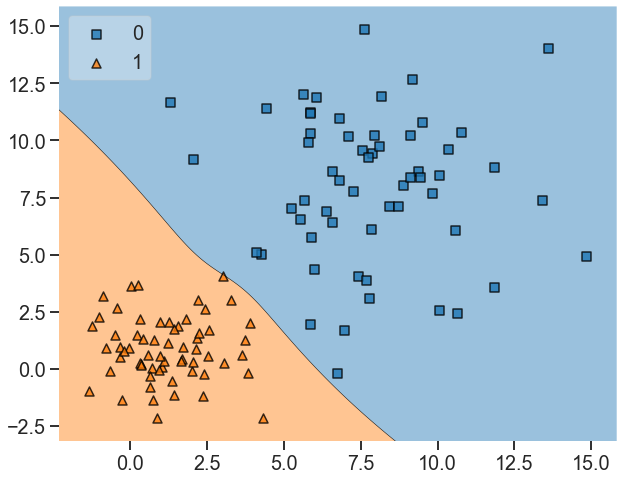

In [13]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=nn, legend=2)
# plt.plot(xx, yy, "k-")
# plt.plot(xx, yy_down, "k--")
# plt.plot(xx, yy_up, "k--")
# plt.show()

### Melhorias no MLP 

#### Regularização 

In [14]:
nn = tp1.tf_build_nn_model(hidden_dimensions= [8], 
                            activation = 'tanh', 
                            optimizer = 'adam', 
                            lr = 0.001, 
                            loss = 'binary_crossentropy',
                            l2_regularization = 0.1)

batch_size = 10
epochs = 600
steps_per_epoch = len(X_train) // (batch_size * 10) # 10 epochs for completing the dataset


train_dataset = tp1.tf_build_dataset(X_train, 
                                        y_train,
                                        batch_size = batch_size, 
                                        training = True)

eval_dataset = tp1.tf_build_dataset(X_test, 
                                        y_test, 
                                        batch_size = batch_size,
                                        training = False)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = epochs / 2, mode = 'auto', verbose = 1)]

history = nn.fit(train_dataset,
                epochs = epochs,
                steps_per_epoch = steps_per_epoch,
                validation_data = eval_dataset, 
                callbacks = []) # callbacks)

Epoch 1/600
2/2 [==============================] - 1s 353ms/step - loss: 1.1899 - accuracy: 0.5500 - binary_acuracy: 0.5500 - auc: 0.3516 - auc_pr: 0.3333 - val_loss: 1.1317 - val_accuracy: 0.4750 - val_binary_acuracy: 0.4750 - val_auc: 0.3674 - val_auc_pr: 0.4266
Epoch 2/600
2/2 [==============================] - 0s 16ms/step - loss: 1.0740 - accuracy: 0.5000 - binary_acuracy: 0.5000 - auc: 0.4798 - auc_pr: 0.5566 - val_loss: 1.1265 - val_accuracy: 0.4833 - val_binary_acuracy: 0.4833 - val_auc: 0.3756 - val_auc_pr: 0.4330
Epoch 3/600
2/2 [==============================] - 0s 16ms/step - loss: 1.1292 - accuracy: 0.3500 - binary_acuracy: 0.3500 - auc: 0.4670 - auc_pr: 0.3185 - val_loss: 1.1214 - val_accuracy: 0.4833 - val_binary_acuracy: 0.4833 - val_auc: 0.3811 - val_auc_pr: 0.4424
Epoch 4/600
2/2 [==============================] - 0s 24ms/step - loss: 1.0780 - accuracy: 0.5000 - binary_acuracy: 0.5000 - auc: 0.5000 - auc_pr: 0.4425 - val_loss: 1.1165 - val_accuracy: 0.4750 - val_binar

#### Fronteira de Decisão 

Bem mais consistente com a fronteira do SVM

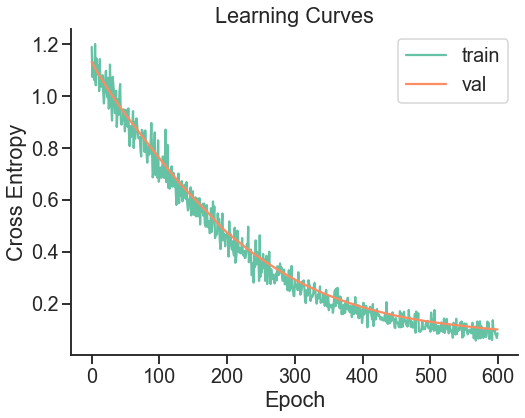

In [15]:
fig = plt.figure(figsize=(8, 6))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
sns.despine()

plt.show()

<AxesSubplot:>

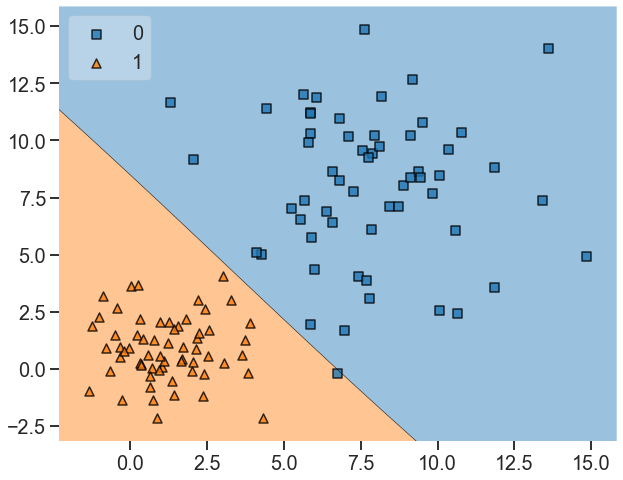

In [16]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=nn, legend=2)

### MLP + Adaboost


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

class customMLPClassifer(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled


    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and
                                            hasattr(self, "classes_")))

In [18]:
adabooster = AdaBoostClassifier(base_estimator=customMLPClassifer(), n_estimators = 20)

adabooster = adabooster.set_params(base_estimator__hidden_layer_sizes = (8,), 
                                   base_estimator__alpha = 0.0001, 
                                   base_estimator__activation = 'tanh', 
                                   base_estimator__early_stopping = False, 
                                   base_estimator__learning_rate_init = 0.001)


adabooster.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=customMLPClassifer(activation='tanh',
                                                     hidden_layer_sizes=(8,)),
                   n_estimators=20)

In [19]:
accuracy = accuracy_score(y_test, adabooster.predict(X_test))
accuracy

0.9833333333333333

<AxesSubplot:>

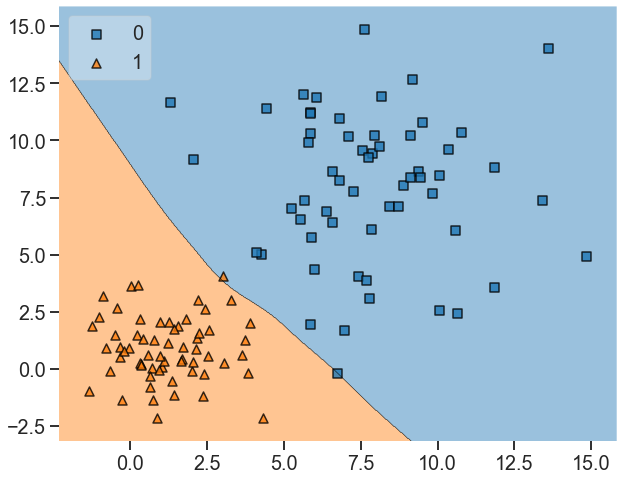

In [20]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=adabooster, legend=2)

### MLP + Formulação SVN / Hinge Loss

$l(y) = max (0, 1 - \hat{y} \cdot y)$



In [228]:
nn = tp1.tf_build_nn_model(hidden_dimensions= [8], 
                            activation = 'tanh', 
                            optimizer = 'adam', 
                            lr = 0.001, 
                            loss = 'hinge',
                            l2_regularization = None)

batch_size = 10
epochs = 1000
steps_per_epoch = len(X_train) // (batch_size * 10) # 10 epochs for completing the dataset


train_dataset = tp1.tf_build_dataset(X_train, 
                                        y_train,
                                        batch_size = batch_size, 
                                        training = True)

eval_dataset = tp1.tf_build_dataset(X_test, 
                                        y_test, 
                                        batch_size = batch_size,
                                        training = False)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = epochs / 2, mode = 'auto', verbose = 1)]

history = nn.fit(train_dataset,
                epochs = epochs,
                steps_per_epoch = steps_per_epoch,
                validation_data = eval_dataset, 
                callbacks = []) # callbacks)

Epoch 1/1000
2/2 [==============================] - 2s 400ms/step - loss: 0.9984 - accuracy: 0.6000 - binary_acuracy: 0.6000 - auc: 0.9479 - auc_pr: 0.8986 - val_loss: 0.9187 - val_accuracy: 0.5500 - val_binary_acuracy: 0.5500 - val_auc: 0.9615 - val_auc_pr: 0.9504
Epoch 2/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9437 - accuracy: 0.6000 - binary_acuracy: 0.6000 - auc: 1.0000 - auc_pr: 1.0000 - val_loss: 0.9163 - val_accuracy: 0.5417 - val_binary_acuracy: 0.5417 - val_auc: 0.9680 - val_auc_pr: 0.9562
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.8373 - accuracy: 0.4500 - binary_acuracy: 0.4500 - auc: 0.9341 - auc_pr: 0.9649 - val_loss: 0.9142 - val_accuracy: 0.5417 - val_binary_acuracy: 0.5417 - val_auc: 0.9727 - val_auc_pr: 0.9607
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9104 - accuracy: 0.6000 - binary_acuracy: 0.6000 - auc: 0.9800 - auc_pr: 0.9799 - val_loss: 0.9121 - val_accuracy: 0.5500 - val_b

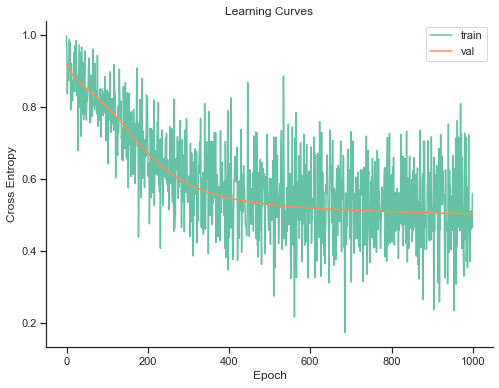

In [229]:
fig = plt.figure(figsize=(8, 6))

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
sns.despine()

plt.show()

<AxesSubplot:>

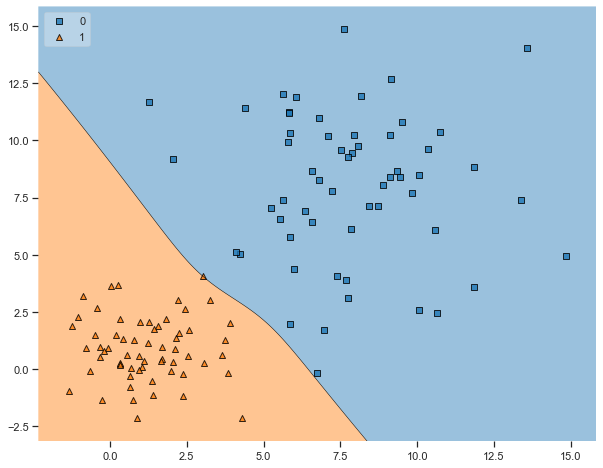

In [225]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=nn, legend=2)

### Large Margin Perceptron 

Formulação do artigo: 

<img src="large_margin_perceptron2.png" alt="drawing" width="600"/>

In [242]:
KERNEL_PARAMETERS = {'kernel_type': 'linear', 'coef0': 1}

clf = tp1.VotedPerceptron(KERNEL_PARAMETERS, error_threshold = 0, max_epochs = 10)
clf.fit(X_train, y_train)

 20%|██        | 2/10 [00:00<00:00, 20.42it/s]


In [243]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

<AxesSubplot:>

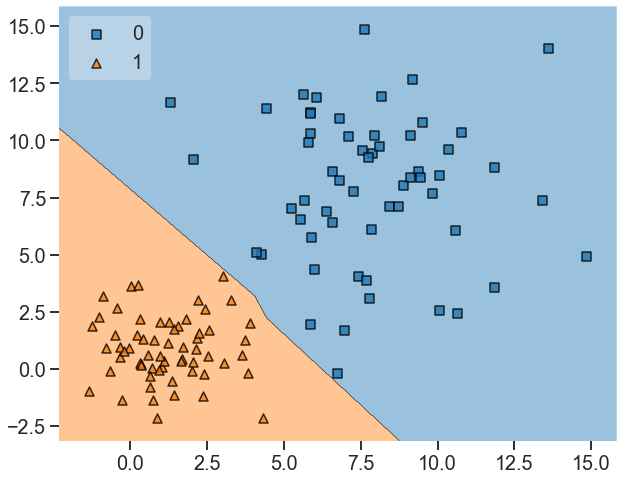

In [244]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=clf, legend=2)

## Experimentos 

Modelos: 
* SVM 
* MLP 
* MLP + Regularização 
* MLP + Adaboost 
* MLP + Hinge Loss
* Formulação Freund & Schapire 1999

Datasets: 
* 2 distribuições Gaussianas
* Iris (setosa contra o resto)
* UCI Control
* UCI Robot 

In [6]:
from sklearn.datasets import load_iris
iris = pd.read_csv(Path("./Datasets/iris.csv"))

control = tp1.parse_dataset_control(Path("./Datasets/data.csv"))
lp4 = tp1.parse_lp_data(Path("./Datasets/lp5.txt"))

#### Overview Dataset Iris

In [192]:
import plotly_express as px

# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)

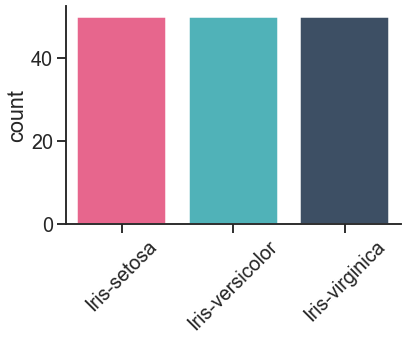

In [196]:
plt.figure(figsize=(6, 4))
sns.countplot(x = "Species", data = iris)
_ = plt.xticks(rotation=45)
plt.xlabel("")
sns.despine()


<Figure size 576x576 with 0 Axes>

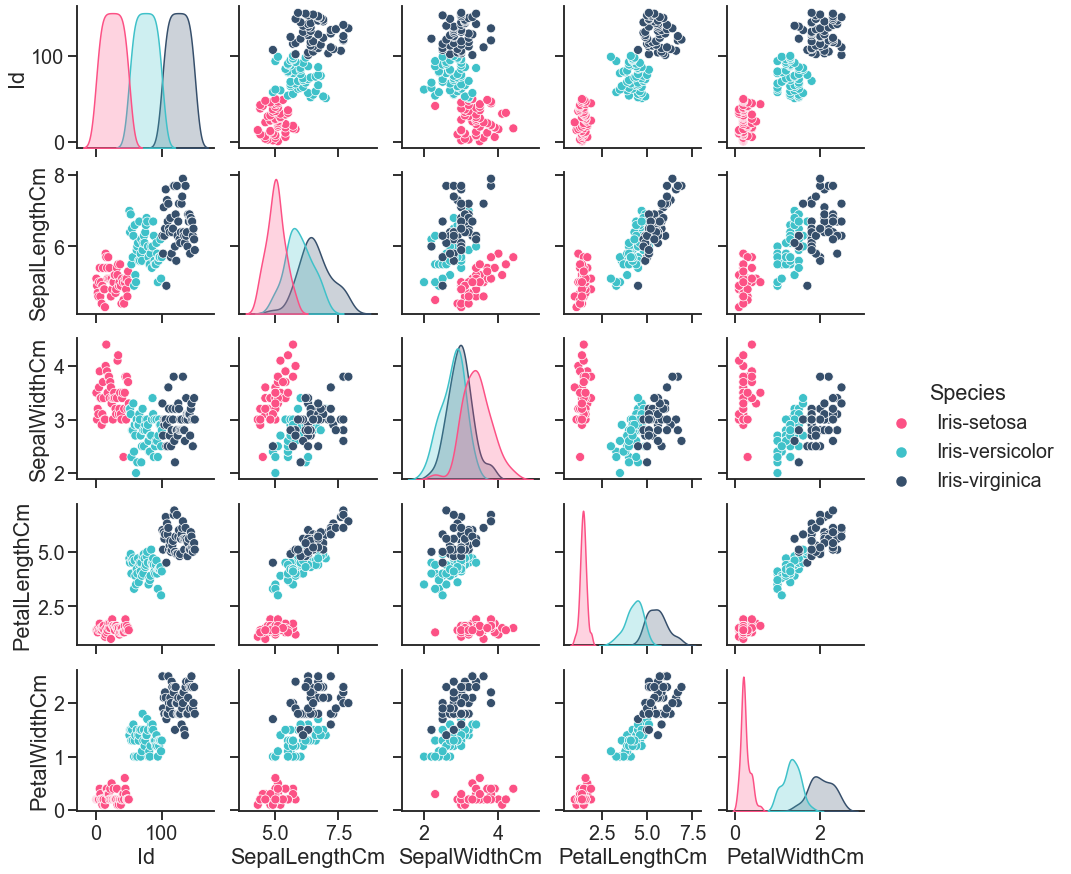

In [199]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(iris, hue='Species')
sns.despine()

plt.show()

In [8]:
import plotly.express as px
px.scatter_3d(iris, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

#### Overview Dataset Synthetic Control Chart Time Series

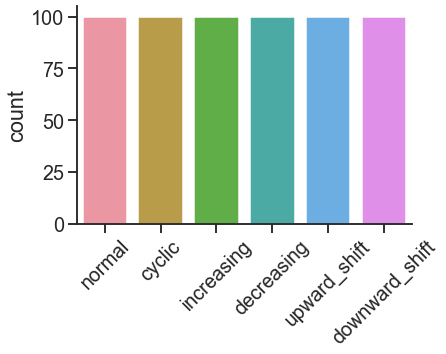

In [197]:
sns.set(style='ticks', palette='Set2')
plt.figure(figsize=(6, 4))
sns.countplot(x = "label", data = control)
_ = plt.xticks(rotation=45)
plt.xlabel("")
sns.despine()


In [182]:
Control_train, Control_test = train_test_split(control, test_size = 0.03, stratify = control['label'])

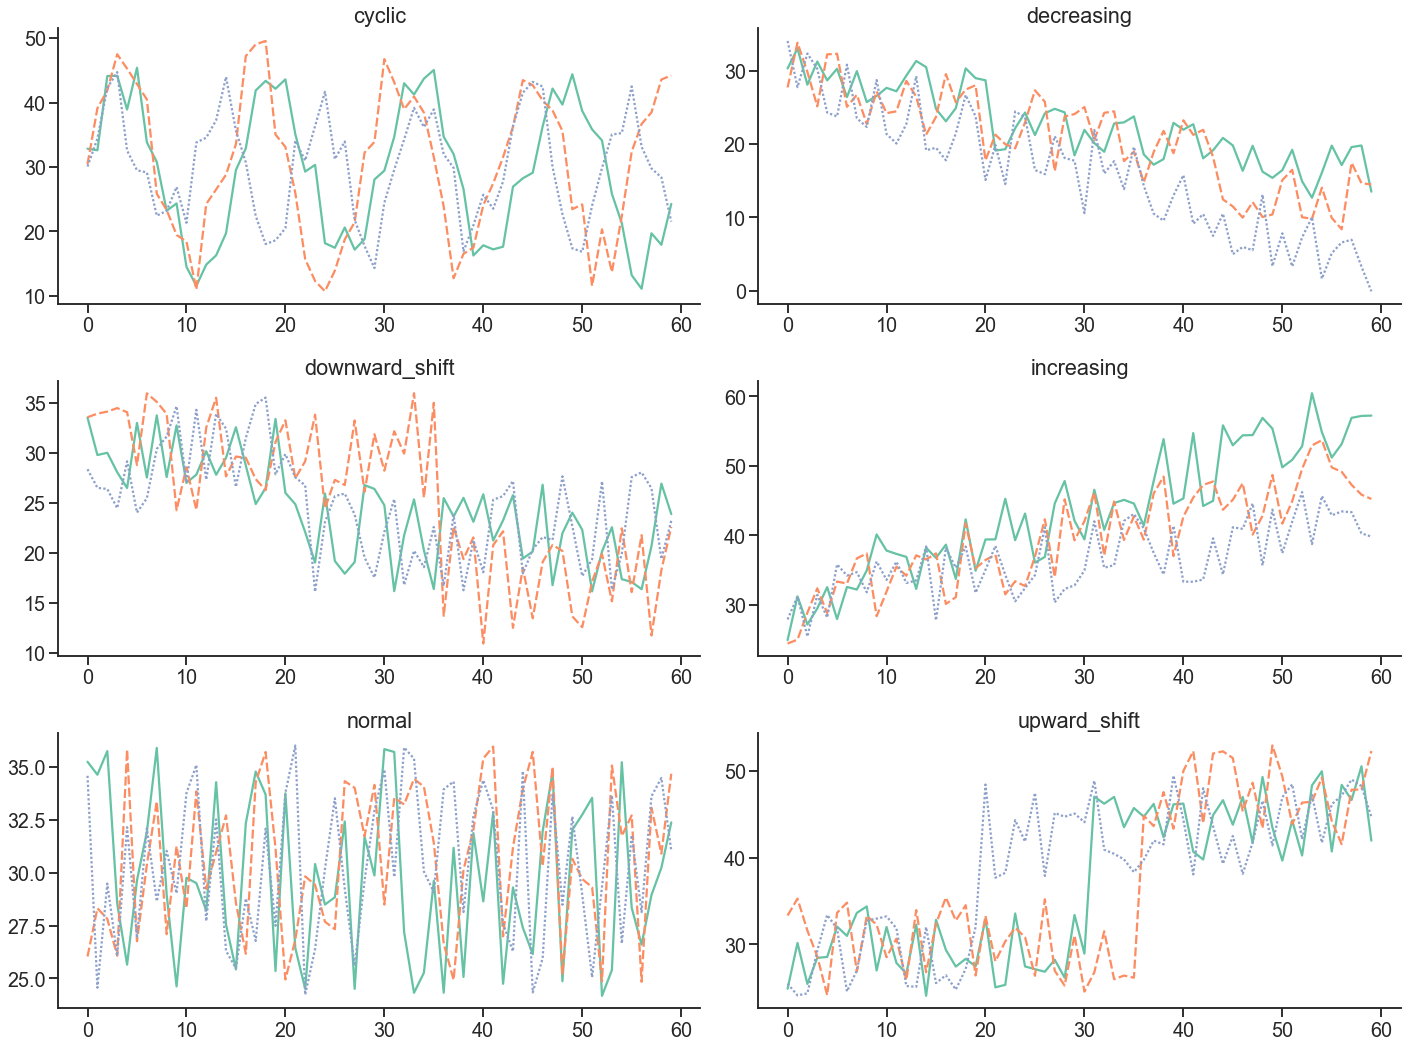

In [184]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
ax = ax.flatten()
i = 0
for grp, df_g in Control_test.groupby('label'):
    df_g.pop('label')
    ax[i].set_title(grp)
    sns.lineplot(data = df_g.transpose(), ax = ax[i], legend = None)
    i = i + 1
    
fig.tight_layout()
sns.despine()

### Overview Dataset LP4

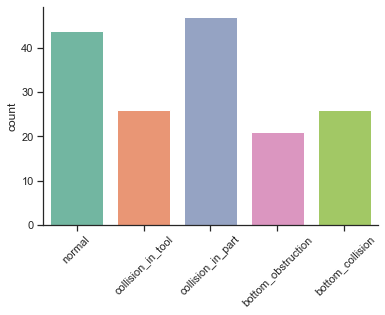

In [220]:
sns.set(style='ticks', palette='Set2')
plt.figure(figsize=(6, 4))
sns.countplot(x = "label", data = lp4)
_ = plt.xticks(rotation=45)
plt.xlabel("")
sns.despine()


### Rodando Experimentos

In [234]:
mlp_hidden_dimensions = [8]
models = {
    "MLP" : tp1.tf_build_nn_model(hidden_dimensions= mlp_hidden_dimensions, 
                            activation = 'tanh', 
                            optimizer = 'adam', 
                            lr = 0.001, 
                            loss = 'binary_crossentropy',
                            l2_regularization = None),
    "MLP + Reg" : tp1.tf_build_nn_model(hidden_dimensions= mlp_hidden_dimensions, 
                            activation = 'tanh', 
                            optimizer = 'adam', 
                            lr = 0.001, 
                            loss = 'binary_crossentropy',
                            l2_regularization = 0.1),               
}

def build_models_dict():
    mlp_hidden_dimensions =(8,)
    adabooster = AdaBoostClassifier(base_estimator=customMLPClassifer(), n_estimators = 20)

    adabooster = adabooster.set_params(base_estimator__hidden_layer_sizes = mlp_hidden_dimensions, 
                                    base_estimator__alpha = 0.0001, 
                                    base_estimator__activation = 'tanh', 
                                    base_estimator__early_stopping = False, 
                                    base_estimator__learning_rate_init = 0.001)

    # KERNEL_PARAMETERS = {'kernel_type': 'linear', 'coef0': 1}
    # KERNEL_PARAMETERS = {'kernel_type': 'polynomial', 'degree': 4, 'gamma': 1, 'coef0': 1}
    KERNEL_PARAMETERS = {'kernel_type': 'gaussian_rbf', 'gamma': 0.03125}

    models = {
        "MLP" : customMLPClassifer(hidden_layer_sizes = mlp_hidden_dimensions, 
                                    alpha = 0.0, 
                                    activation = 'tanh', 
                                    early_stopping = False, 
                                    learning_rate_init = 0.001),


        "MLP + Regularizacao" : customMLPClassifer(hidden_layer_sizes = mlp_hidden_dimensions, 
                                    alpha = 0.0, 
                                    activation = 'tanh', 
                                    early_stopping = False, 
                                    learning_rate_init = 0.001),

        "MLP + Adaboost" : adabooster,

        "Perceptron_LargeMargin" : tp1.VotedPerceptron(KERNEL_PARAMETERS, error_threshold = 0, max_epochs = 10),

        "SVM" : svm.SVC(kernel='rbf', C = 1.0)
    }

    return models


In [247]:
iris['Species'] = np.where(iris['Species'] == 'Iris-setosa', 1, 0)
lp4['label'] = np.where(lp4['label'] == 'normal', 1, 0)
control['label'] = np.where(control['label'] == 'normal', 1, 0)

In [ ]:
iris_labels = iris.pop("Species")
lp4_labels = lp4.pop("label")
control_labels = control.pop("label")

In [269]:
datasets = {
    "2Gaussians" : (X, y),
    "Iris" : (iris.values, iris_labels.values),
    "lp4" : (lp4.values, lp4_labels.values),
    "controle" : (control.values, control_labels.values)
}

In [295]:
data = []
for ds_name, ds in datasets.items():
    models = build_models_dict()

    for model_name, model in models.items():
        print(ds_name, model_name)
        scoring = ['accuracy', 'f1_weighted', 'roc_auc']

        kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=90210)
        scaler = StandardScaler()
        
        training_data = scaler.fit_transform(ds[0])

        cv_results = model_selection.cross_validate(model, training_data, ds[1], cv=kfold, scoring = scoring, error_score="raise")
        df = pd.DataFrame(cv_results)
        df['model'] = [model_name] * len(df)
        df['dataset'] = [ds_name] * len(df)
        data.append(df)
results = pd.concat(data, ignore_index=True)

2Gaussians MLP
2Gaussians MLP + Regularizacao
2Gaussians MLP + Adaboost


 30%|███       | 3/10 [00:00<00:00, 73.18it/s]

2Gaussians Perceptron_LargeMargin


2Gaussians SVM
Iris MLP
Iris MLP + Regularizacao
Iris MLP + Adaboost


 20%|██        | 2/10 [00:00<00:00, 222.33it/s]

Iris Perceptron_LargeMargin
Iris SVM
lp4 MLP


lp4 MLP + Regularizacao
lp4 MLP + Adaboost


 50%|█████     | 5/10 [00:00<00:00, 45.45it/s]

lp4 Perceptron_LargeMargin


100%|██████████| 10/10 [00:00<00:00, 39.84it/s]


lp4 SVM
controle MLP
controle MLP + Regularizacao
controle MLP + Adaboost


 40%|████      | 4/10 [00:00<00:00, 32.52it/s]

controle Perceptron_LargeMargin


 90%|█████████ | 9/10 [00:00<00:00, 15.23it/s]

controle SVM


In [296]:
results.groupby(['dataset', 'model']).mean()

fit_time  score_time  test_accuracy  \
dataset    model                                                         
2Gaussians MLP                     0.239336    0.003997       0.972487   
           MLP + Adaboost          1.748011    0.005334       0.994987   
           MLP + Regularizacao     0.257093    0.003335       0.987469   
           Perceptron_LargeMargin  0.041336    0.027001       0.994987   
           SVM                     0.001000    0.005005       1.000000   
Iris       MLP                     0.089000    0.003001       1.000000   
           MLP + Adaboost          0.121670    0.002997       0.993333   
           MLP + Regularizacao     0.082333    0.002339       1.000000   
           Perceptron_LargeMargin  0.011328    0.009000       1.000000   
           SVM                     0.000668    0.003004       1.000000   
controle   MLP                     0.250997    0.002680       0.908333   
           MLP + Adaboost          4.426992    0.013336       0.985000   
           MLP + Regularizacao     0.195332    0.002334       0.915000   
           Perceptron_LargeMargin  0.433666    0.093333       0.991667   
           SVM                     0.002999    0.006667       0.988333   
lp4        MLP                     0.100684    0.002314       0.701010   
           MLP + Adaboost          2.132317    0.014667       0.737823   
           MLP + Regularizacao     0.092333    0.002666       0.640180   
           Perceptron_LargeMargin  0.298665    0.065333       0.694949   
           SVM                     0.001661    0.002999       0.731538   

                                   test_f1_weighted  test_roc_auc  
dataset    model                                                   
2Gaussians MLP                             0.972460      0.999926  
           MLP + Adaboost                  0.994982      0.999849  
           MLP + Regularizacao             0.987455      0.999924  
           Perceptron_LargeMargin          0.994988      0.997581  
           SVM                             1.000000      1.000000  
Iris       MLP                             1.000000      1.000000  
           MLP + Adaboost                  0.993411      1.000000  
           MLP + Regularizacao             1.000000      1.000000  
           Perceptron_LargeMargin          1.000000      1.000000  
           SVM                             1.000000      1.000000  
controle   MLP                             0.894155      0.937990  
           MLP + Adaboost                  0.984678      0.995275  
           MLP + Regularizacao             0.906783      0.957171  
           Perceptron_LargeMargin          0.991851      0.927622  
           SVM                             0.988635      1.000000  
lp4        MLP                             0.716483      0.726112  
           MLP + Adaboost                  0.752938      0.811769  
           MLP + Regularizacao             0.653869      0.684831  
           Perceptron_LargeMargin          0.627153      0.679503  
           SVM                             0.618351      0.909284

## Margem Larga em Aprendizado Profundo

### Margem Larga em Classificadores no Geral

<img src="LM_deep.png" alt="drawing" width="600"/>

### Margem Larga em Problemas Desbalanceados

<img src="affinity.png" alt="drawing" width="600"/>

$$d(\boldsymbol{f}_{i}, \boldsymbol{y}_{j}) = exp\bigg(-\frac{|| \boldsymbol{f}_{i} -   \boldsymbol{y}_{j}||^2}{\sigma}\bigg)$$

$$L = \sum_{j}max\big(0, \lambda + d(\boldsymbol{f}_{i}, \boldsymbol{y}_{j}) - d(\boldsymbol{f}_{i}, \boldsymbol{y}_{i})\big) : i \neq j$$



In [3]:

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, Callback
import tensorflow.keras.backend as K
from affinity_loss import *
from datasets import inbalanced_mnist

import numpy as np
import os, tarfile
import matplotlib.pyplot as plt


def conv_bn_relu(input, ch):
    x = layers.Conv2D(ch, 3, padding="same")(input)
    x = layers.BatchNormalization()(x)
    return layers.Activation("relu")(x)

def create_models():
    input = layers.Input((28,28,1))
    x = conv_bn_relu(input, 32)
    x = layers.AveragePooling2D(2)(x)
    x = conv_bn_relu(x, 64)
    x = layers.AveragePooling2D(2)(x)
    x = conv_bn_relu(x, 128)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(2, name="latent_features", kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = ClusteringAffinity(10, 1, 5.0)(x)

    return Model(input, x)

def acc(y_true_plusone, y_pred_plusone):
    y_true = K.argmax(y_true_plusone[:, :-1], axis=-1)
    y_pred = K.argmax(y_pred_plusone[:, :-1], axis=-1)
    equals = K.cast(K.equal(y_true, y_pred), "float")
    return K.mean(equals)

def step_decay(epoch):
    x = 1e-3
    if epoch >= 75: x /= 5.0
    return x

class EmbeddingCallback(Callback):
    def __init__(self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train, self.y_train = X_train, y_train[:,:10]
        self.X_test, self.y_test = X_test, y_test[:,:10]

    def plot(self, X, y, title):
        plt.figure(figsize=(10,8))
        latent_model = Model(self.model.input, self.model.get_layer("latent_features").output)
        embedding = latent_model.predict(X, batch_size=128)
        plt.clf()
        cmap = plt.get_cmap("Set2")
        for i in range(y.shape[1]):
            filtered = y[:, i] == 1.0
            plt.scatter(embedding[filtered, 0], embedding[filtered, 1], marker="$"+str(i)+"$", alpha=0.5, color=cmap(i), )
        plt.savefig(title+".png")

    def on_epoch_end(self, epoch, logs):
        output_dir = "mnist_inbalanced"
        if not os.path.exists(output_dir):
            os.mkdir(output_dir)
        self.plot(self.X_train, self.y_train, f"{output_dir}/mnist_train_{epoch:03}")
        self.plot(self.X_test, self.y_test, f"{output_dir}/mnist_test_{epoch:03}")

def train(inbalance_size, epochs = 200):
    (X_train, y_train), (X_test, y_test) = inbalanced_mnist(inbalance_size)

    model = create_models()
    model.compile("adam", affinity_loss(0.75), [acc])

    scheduler = LearningRateScheduler(step_decay)
    cb = EmbeddingCallback(model, X_train, X_test, y_train, y_test)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[cb, scheduler],
                        batch_size=128, epochs=epochs, verbose=1).history

    with tarfile.open("mnist_inbalanced.tar", "w") as tar:
        tar.add("mnist_inbalanced")

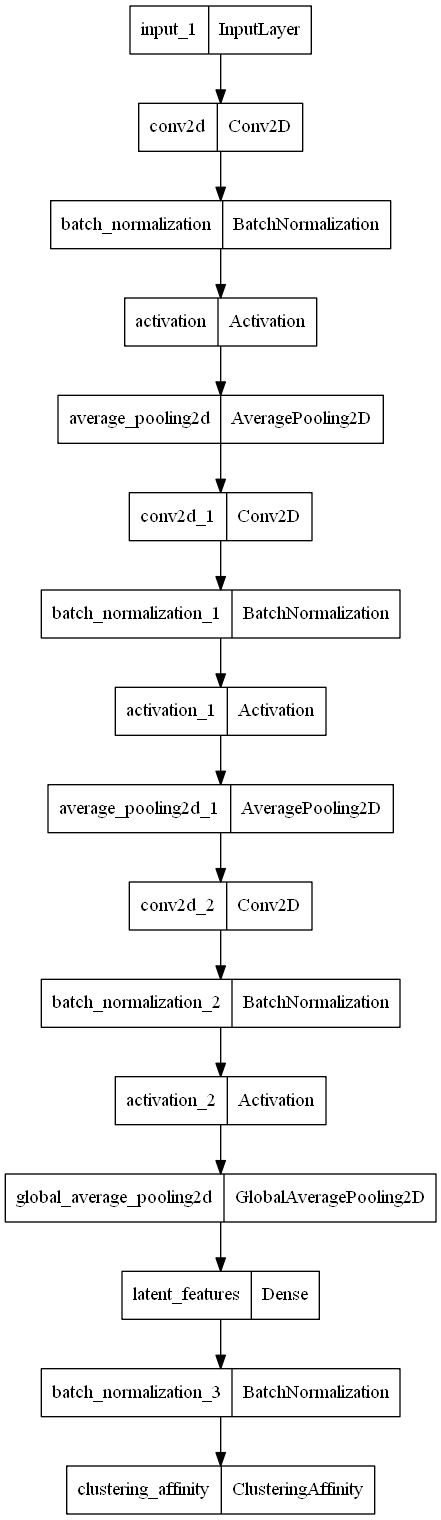

In [4]:
model = create_models()
tf.keras.utils.plot_model(
    model,
    to_file="model_cnn.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

Epoch 1/30
262/262 [==============================] - 48s 177ms/step - loss: 5.3991 - acc: 0.4245 - val_loss: 7.5615 - val_acc: 0.0178 - lr: 0.0010
Epoch 2/30
262/262 [==============================] - 48s 185ms/step - loss: 4.5525 - acc: 0.7713 - val_loss: 5.2908 - val_acc: 0.6505 - lr: 0.0010
Epoch 3/30
262/262 [==============================] - 43s 166ms/step - loss: 4.3120 - acc: 0.8869 - val_loss: 5.0711 - val_acc: 0.8001 - lr: 0.0010
Epoch 4/30
262/262 [==============================] - 42s 161ms/step - loss: 4.2583 - acc: 0.8928 - val_loss: 6.3620 - val_acc: 0.4139 - lr: 0.0010
Epoch 5/30
262/262 [==============================] - 44s 167ms/step - loss: 4.2284 - acc: 0.8970 - val_loss: 4.6082 - val_acc: 0.8386 - lr: 0.0010
Epoch 6/30
262/262 [==============================] - 45s 171ms/step - loss: 4.2149 - acc: 0.8953 - val_loss: 5.1724 - val_acc: 0.6148 - lr: 0.0010
Epoch 7/30
262/262 [==============================] - 44s 166ms/step - loss: 4.2025 - acc: 0.8952 - val_loss: 4.

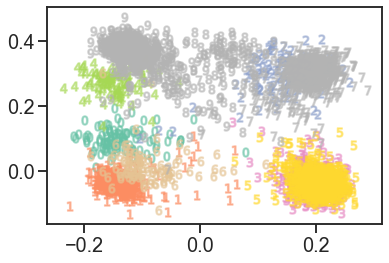

In [310]:
train(100, epochs = 30)

<img src="resultados2.png" alt="drawing" width="800"/>


30 epochs para diferentes valores de missing

|          | 50%    | 30%    |
|----------|--------|--------|
| Softmax  | 88.30% | 73.58% |
| Affinity | 86.98% | 84.21% |

### Adversarial Training para Maximização de Margem

<img src="mma.png" alt="drawing" width="600"/>